In [1]:
!nvidia-smi

Sun May 15 00:55:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install transformers==4.17.0 datasets ckiptagger rouge_score sentencepiece rouge

  Using cached transformers-4.17.0-py3-none-any.whl (3.8 MB)
  Using cached datasets-2.2.1-py3-none-any.whl (342 kB)
  Using cached ckiptagger-0.2.1-py3-none-any.whl (34 kB)
  Using cached rouge_score-0.0.4-py2.py3-none-any.whl (22 kB)
  Using cached sentencepiece-0.1.96-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached rouge-1.0.1-py3-none-any.whl (13 kB)
     |████████████████████████████████| 880 kB 14.5 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 596 kB 71.0 MB/s 
     |████████████████████████████████| 6.6 MB 61.0 MB/s 
     |████████████████████████████████| 136 kB 77.4 MB/s 
     |████████████████████████████████| 212 kB 77.1 MB/s 
     |████████████████████████████████| 1.1 MB 63.8 MB/s 
     |████████████████████████████████| 127 kB 74.7 MB/s 
     |████████████████████████████████| 271 kB 77.1 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |███████████████████████████

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

In [6]:
root = "/content/drive/MyDrive/dataset/ADL2022/HW3/"

In [ ]:
df_train = pd.read_json(root+"data/train.jsonl", lines=True)
df_test = pd.read_json(root+"data/public.jsonl", lines=True)
df_sample_test = pd.read_json(root+"data/sample_test.jsonl", lines=True)
df_submission = pd.read_json(root+"data/sample_submission.jsonl", lines=True)

In [ ]:
df_train.head()

,date_publish,title,source_domain,maintext,split,id
0,2015-03-02 00:00:00,榜首進台大醫科卻休學 、27歲拿到法國天文博士 李悅寧跌破眾人眼鏡返台任教,udn.com,從小就很會念書的李悅寧， 在眾人殷殷期盼下，以榜首之姿進入臺大醫學院， 但始終忘不了對天文的...,train,0
1,2015-10-20 00:00:00,「猩人」真有其事？人猿混種曾成功受孕 揭秘前蘇聯可怕實驗,udn.com,人類與猩猩混種誕下後代，不一定僅限於科幻電影情節。前蘇聯科學家早在1920年代以人工授精技術...,train,1
2,2015-12-10 00:00:00,跑步小品／謝謝三浦春馬 再次喚醒我對跑步的熱情,udn.com,從得知三浦春馬離世的消息那刻開始，心中頓時感到很鬱悶，那種很驚訝、很可惜、很無奈的感覺很重很...,train,2
3,2016-04-22 00:00:00,【身體不適特輯（下）】「拉肚子」、「想吐」、「嘔吐」英文怎麼說？,udn.com,嗨，歡迎回到【身體不適特輯】的下集，在這集裡，小編會繼續講自己食物中毒的故事，以及介紹各種症...,train,3
4,2016-04-29 00:00:00,中職／球彈、好球帶小 投手被打趴百害無一利,udn.com,今年中華職棒官辦熱身賽眾家打者真的打瘋了！數據顯示，官辦熱身賽打了20場，竟然出現多達66轟...,train,4


In [ ]:
df_test.head()

,date_publish,title,source_domain,maintext,split,id
0,2021-01-14 00:00:00,Anker新款真無線藍牙耳機Liberty Air 2 Pro 引進台灣市場,udn.com,Anker在此次CES 2021中，宣布以旗下Soundcore品牌推出新款真無線藍牙耳機L...,dev,21710
1,2021-01-14 00:00:00,藍染、客家美食、舊山線自行車 「苗栗一日遊」超人氣美食美景,udn.com,來到了苗栗旅遊，除了有超人氣的舊山線鐵道自行車外，還有絕不能錯過的客家美食，讓我們跟著兩個女...,dev,21711
2,2021-01-14 00:00:00,華碩打造對應軍規防護與2 in 1設計的15.6吋Chromebook,udn.com,如同其他品牌選擇在CES 2021公布新款Chromebook產品，華碩也宣布推出換上Int...,dev,21712
3,2021-01-14 00:00:00,產業發展變革 台灣的優勢與機會,udn.com,文．洪寶山\n疫情改變全球的生活型態，也改變產業的發展，有些產業受到嚴重波及、有些產業繼之興...,dev,21713
4,2021-01-14 00:00:00,全球Windows 7裝置粗估至少還有1億台以上 市佔率穩穩卡在20％,udn.com,在 2020 年 1 月 14 日，Windows 7 已經正式退出消費市場，不再得到微軟任...,dev,21714


In [ ]:
df_sample_test

,date_publish,source_domain,maintext,split,id
0,2021-01-14 00:00:00,udn.com,Anker在此次CES 2021中，宣布以旗下Soundcore品牌推出新款真無線藍牙耳機L...,dev,21710
1,2021-01-14 00:00:00,udn.com,來到了苗栗旅遊，除了有超人氣的舊山線鐵道自行車外，還有絕不能錯過的客家美食，讓我們跟著兩個女...,dev,21711
2,2021-01-14 00:00:00,udn.com,如同其他品牌選擇在CES 2021公布新款Chromebook產品，華碩也宣布推出換上Int...,dev,21712
3,2021-01-14 00:00:00,udn.com,文．洪寶山\n疫情改變全球的生活型態，也改變產業的發展，有些產業受到嚴重波及、有些產業繼之興...,dev,21713
4,2021-01-14 00:00:00,udn.com,在 2020 年 1 月 14 日，Windows 7 已經正式退出消費市場，不再得到微軟任...,dev,21714
5,2021-01-14 00:00:00,udn.com,文．洪寶山\n雖然川普即將交接美國總統大位，但是留給台灣的影響卻是長久的，尤其是2018年開...,dev,21715
6,2021-01-14 00:00:00,udn.com,新冠肺炎（COVID-19）在全球大流行，台灣因為良好的防疫政策被國際看見。最近有美國的設計...,dev,21716
7,2021-01-14 00:00:00,udn.com,在此次CES 2021期間，華碩宣布更新旗下雙螢幕筆電ZenBook Duo 14，以及Ze...,dev,21717
8,2021-01-14 00:00:00,udn.com,※提醒您：禁止酒駕 飲酒過量有礙健康。\n※飲酒過量，害人害己。\n太想出國自助旅遊機加酒？...,dev,21718
9,2021-01-14 00:00:00,udn.com,哈登（James Harden）與火箭的鬧劇才剛落幕，他被交易至籃網，原本預期與杜蘭特（Ke...,dev,21719


In [ ]:
df_train.split.unique()

array(['train'], dtype=object)

In [ ]:
df_test.split.unique()

array(['dev'], dtype=object)

In [ ]:
def make_file(df):
  new_df = pd.DataFrame()
  new_df["text"] = df.maintext
  new_df["summary"] = df.title
  new_df["id"] = df.id
  return new_df

In [ ]:
train_csv = make_file(df_train)
test_csv = make_file(df_test)

In [ ]:
train_csv.to_csv(root+"data/train.csv", index=False)
test_csv.to_csv(root+"data/test.csv", index=False)

draw

In [22]:
trainer_state = pd.read_json(root+"output/trainer_state.json")

In [37]:
rouge1, rouge2, rougeL, step = [], [], [], []

In [38]:
for history in trainer_state["log_history"]:
  if "eval_rouge1" in history.keys():
    rouge1.append(history["eval_rouge1"])
    rouge2.append(history["eval_rouge2"])
    rougeL.append(history["eval_rougeL"])
    step.append(history["step"])

In [39]:
import matplotlib.pyplot as plt

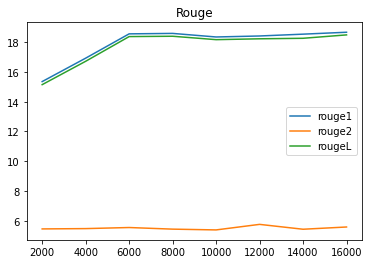

In [42]:
plt.plot(step, rouge1)
plt.plot(step, rouge2)
plt.plot(step, rougeL)
plt.title("Rouge")
plt.legend(["rouge1", "rouge2", "rougeL"], loc="best")
plt.show()


In [28]:
trainer_state["log_history"][1]

{'epoch': 1.47,
 'eval_gen_len': 17.7424,
 'eval_loss': 3.391766786575317,
 'eval_rouge1': 15.353,
 'eval_rouge2': 5.452,
 'eval_rougeL': 15.1469,
 'eval_rougeLsum': 15.1379,
 'eval_runtime': 215.0288,
 'eval_samples_per_second': 25.55,
 'eval_steps_per_second': 0.8,
 'step': 2000}

In [ ]:
export CUDA_VISIBLE_DEVICES=0
python run_summarization.py \
  --do_train \
  --do_eval \
  --model_name_or_path google/mt5-small \
  --train_file ./data/train.jsonl \
  --validation_file ./data/public.jsonl \
  --output_dir ./output/ \
  --num_train_epochs 12 \
  --per_device_train_batch_size=4 \
  --gradient_accumulation_steps=4 \
  --per_device_eval_batch_size=32 \
  --eval_accumulation_steps=4 \
  --predict_with_generate \
  --text_column maintext \
  --summary_column title \
  --logging_steps 2000 \
  --evaluation_strategy steps \
  --eval_steps 2000 \
  --optim adafactor \
  --weight_decay 0.1 \
  --save_strategy epoch \
  --overwrite_output_dir \
  --learning_rate 1e-3 \
  --warmup_ratio 0.1 

In [21]:
import time
while True:
  time.sleep(100000)
  print("hi")

KeyboardInterrupt: ignored

{
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.058804481864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_greedy.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --num_beams 1

{
  "rouge-1": {
    "r": 0.3058880802514959,
    "p": 0.2030681861987249,
    "f": 0.2373590442585388
  },
  "rouge-2": {
    "r": 0.11248540215532868,
    "p": 0.066603899283203,
    "f": 0.08136754768946071
  },
  "rouge-l": {
    "r": 0.2670716640418056,
    "p": 0.17625479991183934,
    "f": 0.2064052527789534
  }
}1
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_beam3.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --num_beams 3

{
  "rouge-1": {
    "r": 0.3085551155935142,
    "p": 0.20860024033998978,
    "f": 0.24213503253037771
  },
  "rouge-2": {
    "r": 0.1149539135395871,
    "p": 0.06974863726995464,
    "f": 0.08448743787633775
  },
  "rouge-l": {
    "r": 0.26933009507521627,
    "p": 0.1812613642262673,    
    "f": 0.21068412698964598
  },
0}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_beam5.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --num_beams 5

{
  "rouge-1": {
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.05880448864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_top_p9.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --top_p 0.9

{
  "rouge-1":{
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.05880448864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_top_p5.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --top_p 0.5

{
  "rouge-1":{
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.05880448864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_top_k10.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --top_k 10

  
{
  "rouge-1":{
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.05880448864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_top_k100.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --top_k 100

{
  "rouge-1":{
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.05880448864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_top_p5_temp05.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --top_p 0.5 \
#   --max_target_length 40 \
#   --temperature 0.5

{
  "rouge_1":{
    "r": 0.2875300586072527,
    "p": 0.19138565286075426,
    "f": 0.2237325745704551
  },
  "rouge-2": {
    "r": 0.10163833307766648,
    "p": 0.05880448864732618,
    "f": 0.07254311019451284
  },
  "rouge-l": {
    "r": 0.25117743390446995,
    "p": 0.16614660827362754,
    "f": 0.19462783251941687
  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_top_p5_temp2.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --top_p 0.5 \
#   --temperature 2

SyntaxError: ignored

    "p": 0.21210891932244727,    "f": 0.24458587385646796  },
  "rouge-2": {
    "r": 0.11553088656993483,
    "p": 0.07121991676686378,
    "f": 0.08581410748833951
  },
  "rouge-l": {
    "r": 0.26891077322652984,
    "p": 0.18414115345721407,
    "f": 0.21257457624784287
  }

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_beam10.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --num_beams 10

{
  "rouge-1":{
    
    "p": 0.21415675165362755,
    "f": 0.24622456383250416
  },
  "rouge-2": {
    "r": 0.11632363064092047,
    "p": 0.07248545392826969,
    "f": 0.08691737476770794
  },
  "rouge-l": {
    "r": 0.270502282227823,
    "p": 0.1864105853122431,
    "f": 0.21450737929654548  }
}

In [ ]:
# python run_summarization.py \
#   --do_predict \
#   --model_name_or_path ./output/checkpoint-12213/pytorch_model.bin \
#   --config_name ./output/config.json \
#   --tokenizer_name ./output/ \
#   --test_file ./data/public.jsonl \
#   --output_file ./output/generation_prediction_beam15.jsonl \
#   --output_dir ./output/ \
#   --predict_with_generate \
#   --text_column maintext \
#   --summary_column title \
#   --overwrite_output_dir \
#   --ignore_pad_token_for_loss \
#   --max_target_length 40 \
#   --num_beams 15

In [51]:
beam15 = pd.read_json(root+"output/generation_prediction_beam15.jsonl", lines=True)
rouge1 = pd.read_json(root+"output/RL_test_rouge1.jsonl", lines=True)
rougeL = pd.read_json(root+"output/RL_test_rougeL.jsonl", lines=True)

In [53]:
beam15.head()

,id,title
0,21710,Anker推出真無線藍牙耳機Liberty Air 2 Pro 加入主動式降噪、收音、收音與...
1,21711,"彷彿置身鐵路藝術極品!苗栗「三義舊山線鐵道自行車」精選,客家美食+客家美食+客家美食"
2,21712,華碩推出換上Intel第11代Core處理器的Chromebook Flip C5 加入支援...
3,21713,掌握疫後智慧商機/理財我最大 帶領讀者掌握疫後產業發展重點 產科國際所長帶領讀者掌握產業新重點
4,21714,全球僅有15億台!Windows 7 已經退出消費市場 但仍有多少裝置仍有2億台上看2億台後...


In [54]:
rouge1.head()

,id,title
0,21710,Anker新款真無線藍牙耳機LibertyAir2Pro預進台灣市場
1,21711,鐵綠鐵綠家美食!美食山線鐵車!三栗鐵遊」氣鐵景
2,21712,華碩推出換應15.6規安全護認安全in1使用Chrome吋機bookFlip
3,21713,疫情發展重革蘇產業產業勢產業會
4,21714,微僅7置的暴超過15億台但佔率達定這


In [55]:
rougeL.head()

,id,title
0,21710,Anker新款真無線藍牙耳機Air2Pro預進台灣市場
1,21711,苗綠鐵綠家必推薦景山線鐵車!舊栗鐵遊」氣路線推薦景
2,21712,華碩換Chrome應16規護防in1使用Chrome吋機book
3,21713,疫情發展大革二產業產業勢挑會
4,21714,微僅7置的暴1115億台但佔率恐定這
